# Genre Prediction based on plot summary

__Contributors__: Aaron Riegel and Christoph Schartner<br>
__Class__: DS200 Introduction to Data Science<br>
__Files__: movie_data.json


In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/christoph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data processing

Reading file from *movie_data.json*

In [3]:
with open(r'movie_data.json', 'r') as json_file:  
    data = json.load(json_file)

In [4]:
movies = pd.DataFrame(data)

In [5]:
movies.drop(movies.columns.difference(['id', 'title', 'genres', 'release_date', 'overview']), axis=1, inplace=True)
movies.dropna(inplace=True)
movies = movies[['id', 'title', 'genres', 'release_date', 'overview']]
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
id              10000 non-null int64
title           10000 non-null object
genres          10000 non-null object
release_date    9995 non-null datetime64[ns]
overview        10000 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 468.8+ KB


Creating binary columns for genres

In [6]:
def update_genre(col):
    for genre in col.genres:
        col.loc[genre['name']] = 1
    return col

In [7]:
genres = set()
for movie in movies['genres']:
    for genre in movie:
        genres.add(genre['name'])
genres = list(genres)

movies = pd.merge(movies,
                  pd.DataFrame(data=np.zeros((movies.shape[0], len(genres)), dtype=int), columns=genres),
                  left_index=True,
                  right_index=True)
movies = movies.apply(update_genre, axis=1)
movies.drop('genres', inplace=True, axis=1)
movies.head()

,id,title,release_date,overview,Romance,History,Animation,Thriller,Mystery,Fantasy,...,Action,Family,Music,War,Adventure,Crime,Comedy,Western,Science Fiction,Drama
0,299537,Captain Marvel,2019-03-06,The story follows Carol Danvers as she becomes...,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,As Hiccup fulfills his dream of creating a pea...,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,399579,Alita: Battle Angel,2019-01-31,When Alita awakens with no memory of who she i...,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,450001,Master Z: Ip Man Legacy,2018-12-20,"After being defeated by Ip Man, Cheung Tin Chi...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,Gellert Grindelwald has escaped imprisonment a...,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


## Visualization

Text(0.5, 0, 'Number of movies')

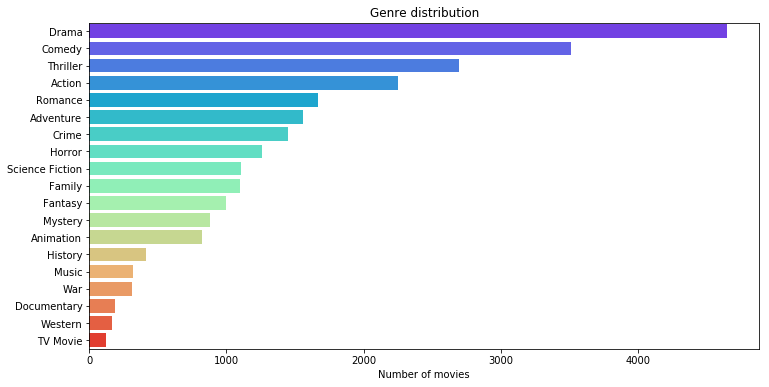

In [8]:
plt.figure(figsize=(12,6), ) 
genre_count = movies[genres].sum().sort_values(ascending=False)
g = sns.barplot(genre_count.values, genre_count.index, palette='rainbow', )
g.set
g.set_title('Genre distribution')
g.set_xlabel('Number of movies')

KeyError: 'person'

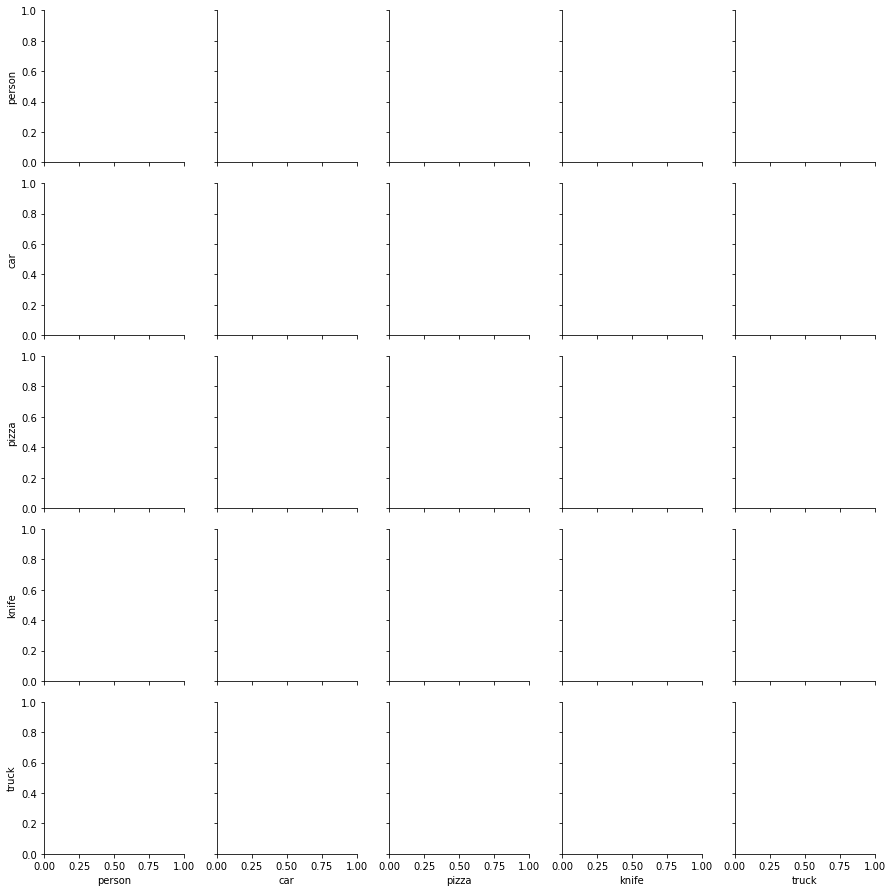

In [10]:
pair = sns.pairplot(movies.drop(['title'],axis=1),
                    vars=['person','car', 'pizza','knife','truck'],
                    hue= 'Action')

## Analysis

Clean Data

In [9]:
def clean(text): # use regular expression to remove specific characters
    text = re.sub("\'", " ", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [10]:
movies['clean_overview'] = movies['overview'].astype(str).apply(lambda x: clean(x))

In [11]:
movies.head()

,id,title,release_date,overview,TV Movie,Family,Comedy,Western,Music,Action,...,Mystery,Drama,Documentary,Science Fiction,Fantasy,Romance,History,Horror,Thriller,clean_overview
0,299537,Captain Marvel,2019-03-06,The story follows Carol Danvers as she becomes...,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,the story follows carol danvers as she becomes...
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,As Hiccup fulfills his dream of creating a pea...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,as hiccup fulfills his dream of creating a pea...
2,399579,Alita: Battle Angel,2019-01-31,When Alita awakens with no memory of who she i...,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,when alita awakens with no memory of who she i...
3,450001,Master Z: Ip Man Legacy,2018-12-20,"After being defeated by Ip Man, Cheung Tin Chi...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,after being defeated by ip man cheung tin chi ...
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,Gellert Grindelwald has escaped imprisonment a...,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,gellert grindelwald has escaped imprisonment a...


## YOLO Data Approach

In [33]:
y = final.drop(final[['id','title']], axis = 1)
y = y[['Mystery', 'Animation', 'Music', 'History', 'Comedy', 'Science Fiction',
       'Family', 'Fantasy', 'Romance', 'Horror', 'War', 'Documentary',
       'TV Movie', 'Adventure', 'Drama', 'Western', 'Thriller', 'Action',
       'Crime']]

In [49]:
X = final.drop(final[['Mystery', 'Animation', 'Music', 'History', 'Comedy', 'Science Fiction',
       'Family', 'Fantasy', 'Romance', 'Horror', 'War', 'Documentary',
       'TV Movie', 'Adventure', 'Drama', 'Western', 'Thriller', 'Action',
       'Crime','overview','release_date']], axis = 1)
X = X.drop(X[['title','id']], axis = 1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.svm import SVC

In [53]:
from sklearn.multiclass import OneVsRestClassifier

In [54]:
model = OneVsRestClassifier(SVC(gamma='auto'))

In [ ]:
model.fit(X_train,y_train)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(f'{classification_report(y_test,predicted)}')

### Word2Vec Approach

In [56]:
movies_path = '../Data/movies_df.csv'

In [57]:
movies = pd.read_csv(movies_path)

In [58]:
movies.columns

Index(['id', 'title', 'release_date', 'overview', 'Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music'],
      dtype='object')

In [62]:
movies = movies.drop(['release_date'], axis=1)

In [63]:
movies = movies.drop(['overview'],axis=1)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
filename = '../GoogleNews-vectors-negative300.bin'

In [ ]:
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
stoplist = set('for a of the and to in : &'.split())
punctuation = set('; / " . , :'.split())

In [ ]:
def most_likely(title, genres = ['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime']):
    
    broken_title = title.split(' ')

    print(broken_title)
    dists = []
    d = [0] * len(genres)
    for word in broken_title:
        if word.lower() in stoplist:
            continue
        
        else:
            for stop in punctuation:
                if stop in word:
                    word = word.split(stop)[0]
                
            for genre in genres:
                d[genres.index(genre)] += model.distance(word.lower(), genre)
            
    dists = [x / len(broken_title) for x in d]
    
    
    print(sorted(zip(dists,genres), reverse = False)[:3])



In [ ]:
genres = ['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime']
most_likely('how to train your dragon:', genres)

### TF-IDF Approach

In [64]:
import re
import nltk

In [66]:
df = pd.read_csv('../Data/movies_df.csv')

In [67]:
def clean(text): # use regular expression to remove specific characters
    text = re.sub("\'", " ", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [68]:
df['clean_overview'] = df['overview'].astype(str).apply(lambda x: clean(x))

In [69]:
stpwrds = set(nltk.corpus.stopwords.words('english'))

In [70]:
def remove_stops(text):
    cleaned = [w for w in text.split() if not w in stpwrds]
    return ' '.join(cleaned)

In [71]:
df['clean_overview'] = df['clean_overview'].astype(str).apply(lambda x: remove_stops(x))

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [74]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [75]:
X = df['clean_overview']
y = df[['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf_xtrain = tfidf_vectorizer.fit_transform(X_train)
tfidf_xtest = tfidf_vectorizer.transform(X_test)

In [77]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [ ]:
model = OneVsRestClassifier(SVC(gamma = 'auto',kernel = 'linear'))

In [ ]:
model.fit(tfidf_xtrain, y_train)

In [ ]:
predictions = model.predict(tfidf_xtest)

In [ ]:
print(classification_report(predictions,y_test))

#### Use Multilabel Binarizer Instead

In [78]:
def make_genre_list(s):
    genre_list = ['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']
    gen = []
    for g in genre_list:
        if s.loc[g] == 1:
            gen.append(g)
    return gen

In [79]:
df['genre_list'] = df.apply(lambda row : make_genre_list(row), axis = 1)

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer

In [81]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['genre_list'])

X = df['clean_overview']
y = multilabel_binarizer.transform(df['genre_list'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tfidf_xtrain = tfidf_vectorizer.fit_transform(X_train)
tfidf_xtest = tfidf_vectorizer.transform(X_test)

In [ ]:
model = OneVsRestClassifier(SVC(gamma = 'auto', kernel = 'linear'))

In [ ]:
model.fit(tfidf_xtrain, y_train)

In [ ]:
predictions = model.predict(tfidf_xtest)

In [ ]:
print(classification_report(predictions,y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logovr = OneVsRestClassifier(LogisticRegression())

In [ ]:
logovr.fit(tfidf_xtrain, y_train)

In [ ]:
predicted = logovr.predict(tfidf_xtest)

In [ ]:
print(classification_report(predicted, y_test))

In [ ]:
mbi = multilabel_binarizer.inverse_transform(predicted)

In [ ]:
y_test_df = pd.DataFrame()
y_test_df['genres'] = y_test.apply(lambda row : make_genre_list(row), axis = 1)

In [ ]:
ytgenres = list(y_test_df['genres'])

In [ ]:
for i in range(len(mbi)):
    print(f'{mbi[i]}\t\t\t\t{ytgenres[i]}')

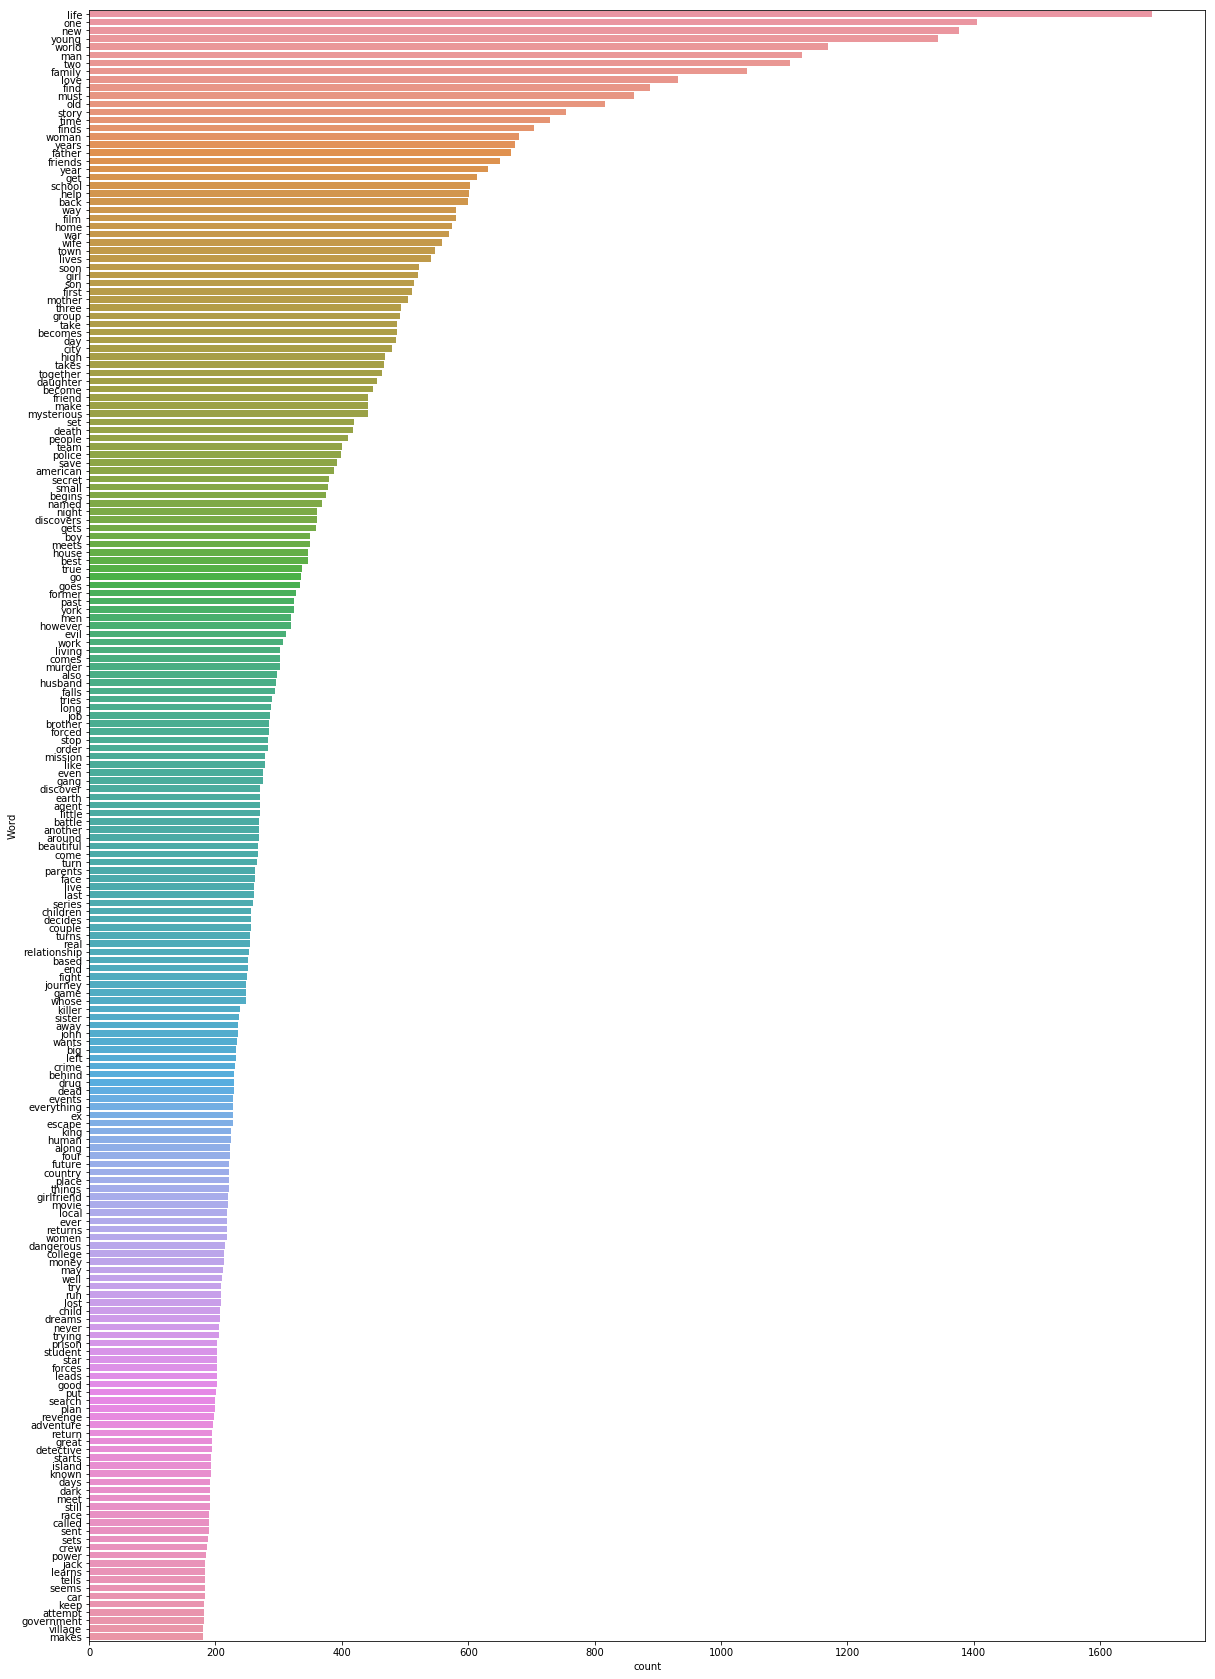

In [17]:
word_counts(movies['clean_overview'], 200)